In [1]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from scipy import signal
import numpy as np
from matplotlib.pyplot import step, show
import matplotlib.pyplot as plt
import math

In [2]:
#Esta celda es para cambiar los tamaños de las figuras a mostrar
plt.rcParams['figure.figsize']=[16,12]
plt.rcParams.update({'font.size':18})

In [3]:
def isPowerOfTwo(n): 
    return (math.ceil(Log2(n)) == math.floor(Log2(n)));

In [37]:
def convertToStr(bin_data):
    # initializing a empty string for  
# storing the string data 
    str_data =' '
   
# slicing the input and converting it  
# in decimal and then converting it in string 
    for i in range(0, len(bin_data), 7): 
      
    # slicing the bin_data from index range [0, 6] 
    # and storing it as integer in temp_data 
        temp_data = int(bin_data[i:i + 7]) 
       
    # passing temp_data in BinarytoDecimal() function 
    # to get decimal value of corresponding temp_data 
        decimal_data = BinaryToDecimal(temp_data) 
       
    # Deccoding the decimal value returned by  
    # BinarytoDecimal() function, using chr()  
    # function which return the string corresponding  
    # character for given ASCII value, and store it  
    # in str_data 
        str_data = str_data + chr(decimal_data)  
    return str_data

In [35]:
def BinaryToDecimal(binary):  
         
    binary1 = binary  
    decimal, i, n = 0, 0, 0
    while(binary != 0):  
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)  
        binary = binary//10
        i += 1
    return (decimal) 

In [4]:
def Log2(x): 
    if x == 0: 
        return False; 
    return (math.log10(x)/math.log10(2)); 

In [5]:
def calcRedundantBits(m):   
    # Usar la fórmula 2 ^ r >= m + r + 1 
    # para calcular el número de bits redundantes. 
    # que se añaden a la información
    for i in range(m): #Se ejecuta hasta que se cumpla la fórmula anterior
        if(2**i >= m + i + 1): 
            return i 
    # r: bits redundantes
    # m: bits de datos  

In [6]:
def posRedundantBits(data, r): 
  
    # Los bits redundantes son colocacodos en las posiciones
    # las cuales corresponden a la potencia de 2
    j = 0
    k = 1
    m = len(data) 
    res = '' 
  
    # Si la posición es de potencia 2 se inserta '0' 
    # de lo contrario agrega los datos 
    for i in range(1, m + r+1): 
        if(i == 2**j): 
            res = res + '0'
            j += 1
        else: 
            res = res + data[-1 * k] 
            k += 1
  
    # El resultado se invierte ya que las posiciones se 
    # cuentan hacia atrás. (m + r+1 ... 1) 
    return res[::-1] 

In [7]:
def calcParityBits(arr, r): 
    n = len(arr) 
  
    # Se calcula usando la verificación de paridad en todas las 
    # posiciones de los bits cuya representación binaria incluye
    # un 1 en la posición menos significativa.
    for i in range(r): 
        val = 0
        for j in range(1, n + 1):  
            if(j & (2**i) == (2**i)): 
                val = val ^ int(arr[-1 * j]) 
                # -1 * j es porque la matriz se invierte 
  
        # Concatenación de la cadena String 
        # (0 a n - 2^r) + bit de paridad + (n - 2^r + 1 a n) 
        arr = arr[:n-(2**i)] + str(val) + arr[n-(2**i)+1:] 
    return arr 

In [8]:
def detectError(arr, nr): 
    n = len(arr) 
    res = 0
  
    # Calcular los bits de paridad de nuevo
    for i in range(nr): 
        val = 0
        for j in range(1, n + 1): 
            if(j & (2**i) == (2**i)): 
                val = val ^ int(arr[-1 * j]) 
  
        res = res + val*(10**i) 
    # Convierte el valor binario a decimal 
    return int(str(res), 2) 

In [9]:
a_string="casa"#Mensaje a enviar
a_byte_array=bytearray(a_string,"utf8")#Convertimos a un arreglo de bytes
byte_list=[]
for byte in a_byte_array:
    binary_representation=bin(byte)
    byte_list.append(binary_representation[2:])
print(byte_list)

['1100011', '1100001', '1110011', '1100001']


In [10]:
i=len(byte_list)
j=0
data1=[] #En esta variable se guardan los bits como un vector único
while j<i:
    data1.append(int(byte_list[j][0]))
    data1.append(int(byte_list[j][1]))
    data1.append(int(byte_list[j][2]))
    data1.append(int(byte_list[j][3]))
    data1.append(int(byte_list[j][4]))
    data1.append(int(byte_list[j][5]))
    data1.append(int(byte_list[j][6]))
    j=j+1

Gráfico del mensaje original


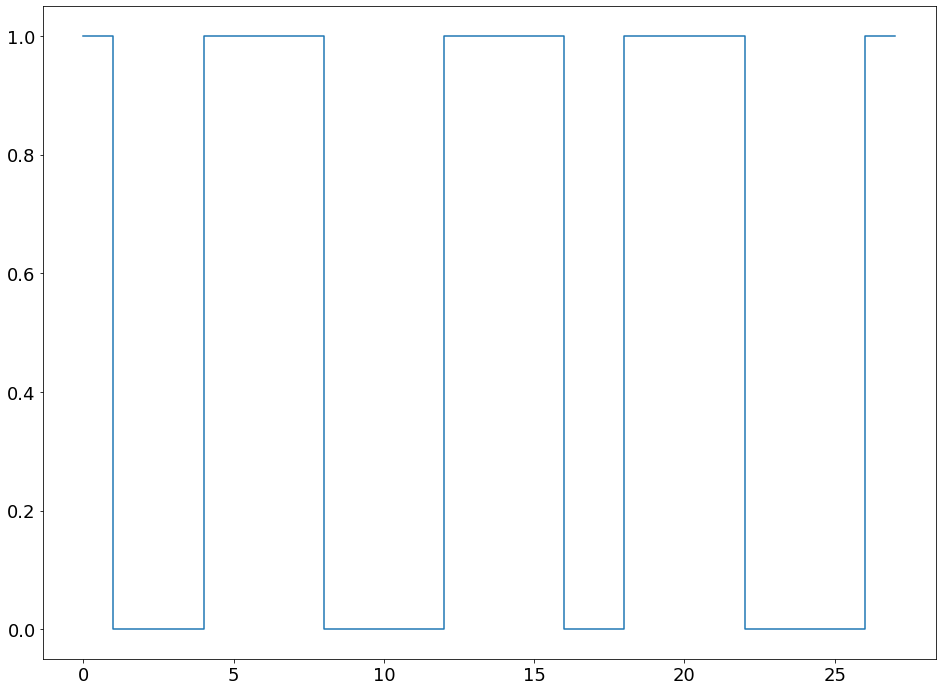

In [11]:
mensaje=[]#Contendrá el mensaje completo con los valores enteros 0 y 1
data=[]
j=0
for x in data1:
    data.append(j)
    j=j+1

j=0
for x in byte_list:
    mensaje.append(byte_list[j][0])
    mensaje.append(byte_list[j][1])
    mensaje.append(byte_list[j][2])
    mensaje.append(byte_list[j][3])
    mensaje.append(byte_list[j][4])
    mensaje.append(byte_list[j][5])
    mensaje.append(byte_list[j][6])
    j=j+1
print('Gráfico del mensaje original')
xaxis = np.arange(0, data[-1] + 1)
yaxis = np.array(data1)
step(xaxis, yaxis)
show()


In [12]:
m = len(mensaje) #Se calcula la longitud del mensaje
r = calcRedundantBits(m) #Se calculan los bits redundantes
arr = posRedundantBits(mensaje, r) #Se calculan las posiciones de los bits redundantes
arr = calcParityBits(arr, r)#Se calculan los bits de paridad
secuencia=arr#Mensaje con Hamming aplicado
print(arr)
print(secuencia)

1100001111000011110001111000000100
1100001111000011110001111000000100


In [13]:
# PROCEDIMIENTO
n = len(secuencia)
# texto a símbolos PAM
senalbit = np.zeros(n,dtype=int)
for i in range(0,n,1):
    senalbit[i] = int(secuencia[i])
    if (senalbit[i]==0):
        senalbit[i] = -1
# Señal en PAM
anchobit = 100 # muestras dentro de cada bit
senalpam = np.repeat(senalbit, anchobit)
m = len(senalpam)

# Eje de tiempo:
ti = np.arange(0,m,dtype=float)
ti = ti/anchobit

# Señal PSK
f = 1
senalpsk = np.zeros(m,dtype=float)
for i in range(0,m,1):
    fase = (np.pi/2)*senalpam[i]
    senalpsk[i] = np.cos(2*np.pi*f*ti[i] + fase)


In [14]:
#Se crea una distribución gaussiana con media 0 y desviación estándar 1
noise = [gauss(0.0, 0.1) for i in range(len(senalpsk))]
noise = Series(noise) #noise es el ruido con la distribución indicada
print('Ruido generado')

Ruido generado


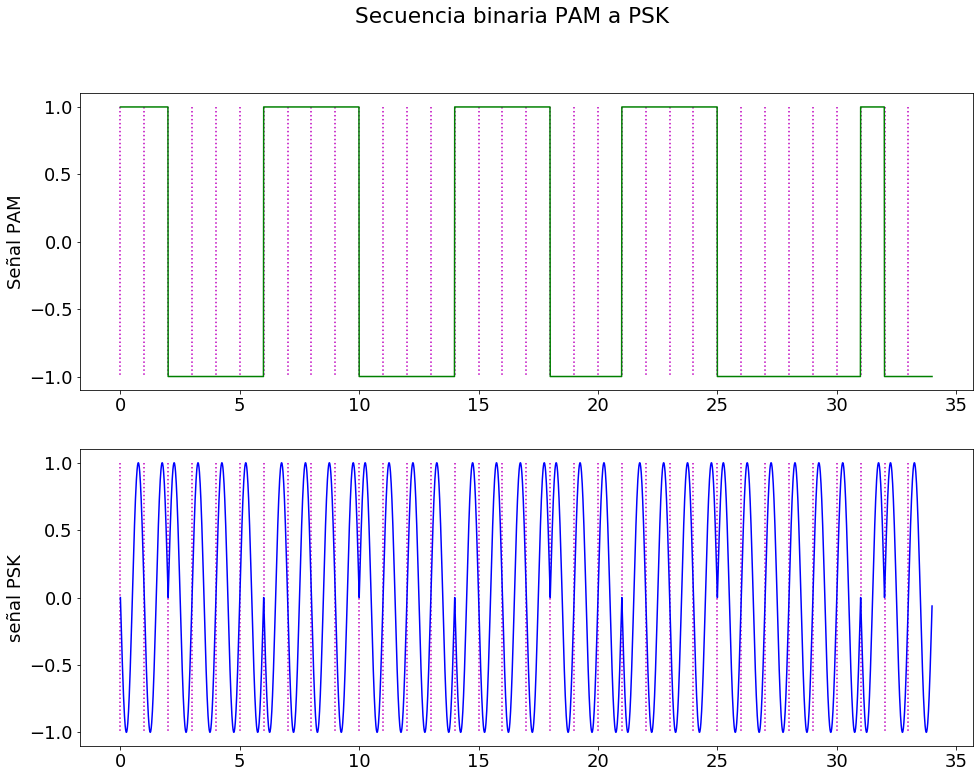

In [15]:
# SALIDA Gráfica
# Señal PAM
plt.subplot(211)
plt.plot(ti,senalpam, color='g')
for k  in range(0,n,1):
    plt.vlines(k,1,-1, color= 'm', linestyles='dotted')
plt.ylabel('Señal PAM')
# Señal PSK
plt.subplot(212)
plt.plot(ti,senalpsk, color='b')
for k  in range(0,n,1):
    plt.vlines(k,1,-1, color= 'm', linestyles='dotted')
plt.ylabel('señal PSK')
plt.suptitle('Secuencia binaria PAM a PSK')
plt.show()

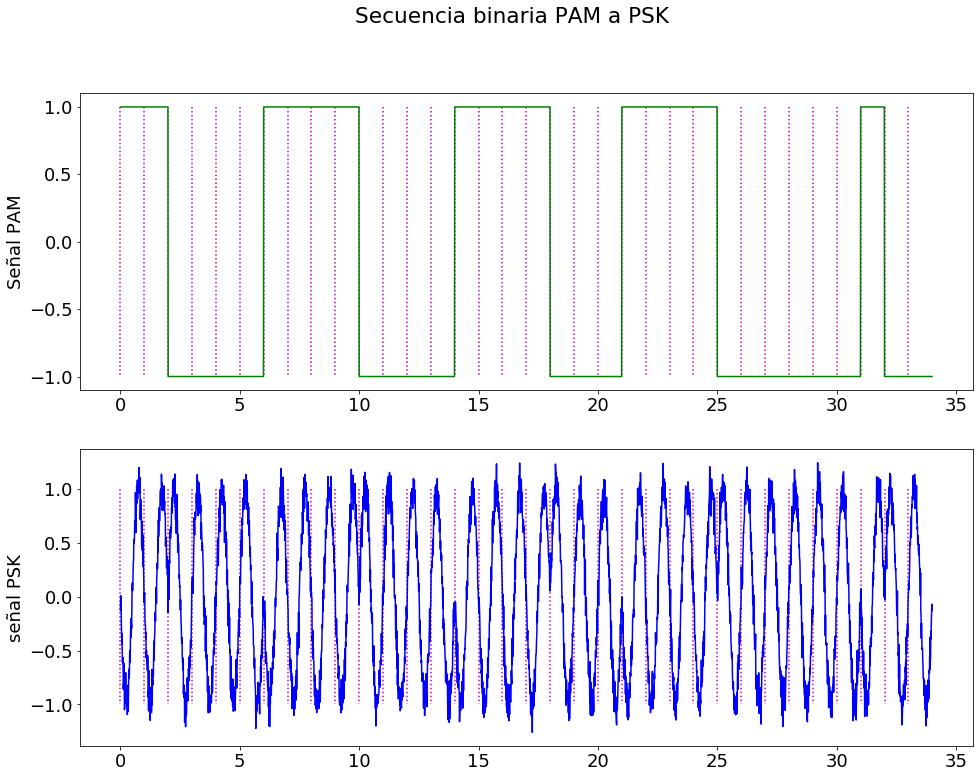

In [16]:
# SALIDA Gráfica con ruido
# Señal PAM
plt.subplot(211)
plt.plot(ti,senalpam, color='g')
for k  in range(0,n,1):
    plt.vlines(k,1,-1, color= 'm', linestyles='dotted')
plt.ylabel('Señal PAM')
# Señal PSK
plt.subplot(212)
plt.plot(ti,senalpsk+noise, color='b')
for k  in range(0,n,1):
    plt.vlines(k,1,-1, color= 'm', linestyles='dotted')
plt.ylabel('señal PSK')
plt.suptitle('Secuencia binaria PAM a PSK')
plt.show()

In [17]:
#Lo siguiente es para simular un filtro a través de la transformada rápida de Fourier
dt=100
n=len(ti)
fhat=np.fft.fft(senalpsk+noise,n)#Se computa la FFT
PSD=fhat*np.conj(fhat)/n #Densidad de potencia espectral (Power spectral density)
freq=(1/(dt*n))*np.arange(n) #Variable para el eje x de frecuencia
L=np.arange(1,np.floor(n/2),dtype='int') #Solo se gráfica la primera mitad

In [18]:
#Se utiliza la variable PSD para filtrar el ruido
indices=PSD>10 #Encuentra todas las frecuencias con mayor potencia a la indicada
PSDclean=PSD*indices #Se hacen cero todas las demás
fhat=indices*fhat #Se hacen cero todos los coeficientes pequeños de Fourier. En Y
ffilt=np.fft.ifft(fhat) #Transformada inversa FFT para la señal en el tiempo filtrada

C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


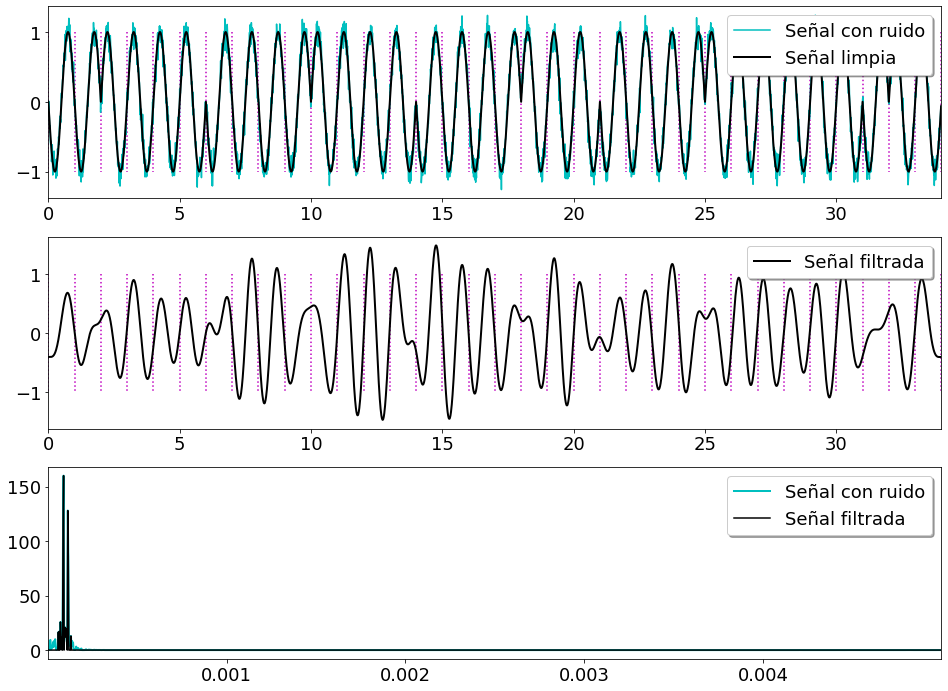

In [19]:
fig,axs=plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(ti,senalpsk+noise,color='c',LineWidth=1.5,label='Señal con ruido')
plt.plot(ti,senalpsk,color='k',LineWidth=2,label='Señal limpia')
plt.xlim(ti[0],ti[-1])
plt.legend(loc='upper right', shadow=True, fontsize='medium')

for k  in range(0,n,1):
    plt.vlines(k,1,-1, color= 'm', linestyles='dotted')
    
plt.sca(axs[1])
plt.plot(ti,ffilt,color='k',LineWidth=2,label='Señal filtrada')
plt.xlim(ti[0],ti[-1])
plt.legend(loc='upper right', shadow=True, fontsize='medium')

for k  in range(0,n,1):
    plt.vlines(k,1,-1, color= 'm', linestyles='dotted')

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='c',LineWidth=2,label='Señal con ruido')
plt.plot(freq[L],PSDclean[L],color='k',LineWidth=1.5,label='Señal filtrada')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend(loc='upper right', shadow=True, fontsize='medium')
plt.show()

In [20]:
def promedio(signal,k):
    bit_suma=0
    j=0
    while j<100:
        bit_suma=bit_suma+signal[j+k]
        j=j+1
    promedio=bit_suma/100
    return promedio
        

In [21]:
def obtener_bit(signal,h):
    z=0
    bit=False
    while z<50:
        if signal[h+z]<0:
            bit=True
        else:
            bit=False
        z=z+1
    return bit

In [22]:
#Procedemos a obtener la señal binaria a partir de la portadora PSK sin ruido
senal_original=[]
#Obtenemos los bits de la señal binaria
z=0
while z<34:
    bit=obtener_bit(senalpsk,z*100)
    if bit==True:
        senal_original.append(1)
    else:
        senal_original.append(0)
    z=z+1
print(senal_original)
j=0
senal_secuencia=''
while j<len(senal_original):
    if senal_original[j]==1:
        senal_secuencia=senal_secuencia+'1'
    else:
        senal_secuencia=senal_secuencia+'0'
    j=j+1
print(senal_secuencia)   

[1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
1100001111000011110001111000000100


Gráfico del mensaje obtenido sin ruido


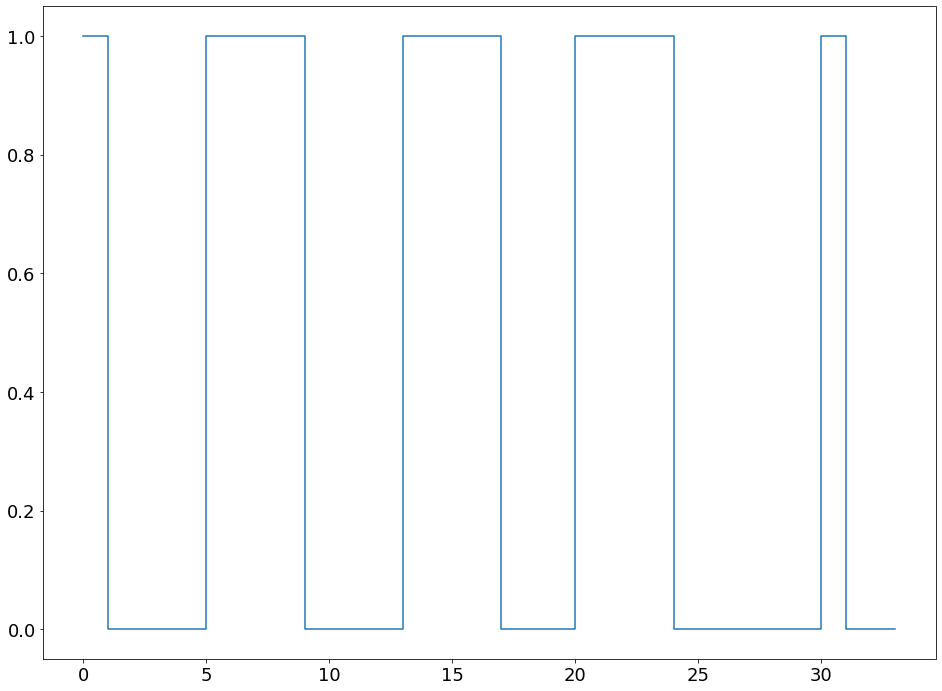

In [23]:
j=0
for x in senal_original:
    data.append(j)
    j=j+1
print('Gráfico del mensaje obtenido sin ruido')
xaxis = np.arange(0, data[-1] + 1)
yaxis = np.array(senal_original)
step(xaxis, yaxis)
#for k  in range(0,n,1):
#    plt.vlines(k,1,-1, color= 'm', linestyles='dotted') 
show()

In [24]:
position=detectError(senal_secuencia,6)
print(position)

0


In [29]:
#Decodificamos Hamming
data_list=list(senal_secuencia)
i=1
data_retrieve=[]
while i<len(data_list):
    if isPowerOfTwo(i):
         print(data_list[i])
    else:
        data_retrieve.append(data_list[-i])
    i=i+1
data_retrieve.append(data_list[0])
data_retrieve.reverse()
n=7
i=0
data_cipher=[data_retrieve[i:i+n] for i in range(0, len(data_retrieve), n)]
print(data_cipher)

1
0
0
1
1
0
[['1', '1', '0', '0', '0', '1', '1'], ['1', '1', '0', '0', '0', '0', '1'], ['1', '1', '1', '0', '0', '1', '1'], ['1', '1', '0', '0', '0', '0', '1']]


In [42]:
#Obtenemos la plabra enviada por el mensaje
bin_data1=data_cipher[0][0]+data_cipher[0][1]+data_cipher[0][2]+data_cipher[0][3]+data_cipher[0][4]+data_cipher[0][5]+data_cipher[0][6]
bin_data2=data_cipher[1][0]+data_cipher[1][1]+data_cipher[1][2]+data_cipher[1][3]+data_cipher[1][4]+data_cipher[1][5]+data_cipher[1][6]
bin_data3=data_cipher[2][0]+data_cipher[2][1]+data_cipher[2][2]+data_cipher[2][3]+data_cipher[2][4]+data_cipher[2][5]+data_cipher[2][6]
bin_data4=data_cipher[3][0]+data_cipher[3][1]+data_cipher[3][2]+data_cipher[3][3]+data_cipher[3][4]+data_cipher[3][5]+data_cipher[3][6]
letra1=convertToStr(bin_data1)
letra2=convertToStr(bin_data2)
letra3=convertToStr(bin_data3)
letra4=convertToStr(bin_data4)
palabra=letra1+letra2+letra3+letra4
print(palabra)

 c a s a


In [43]:
#Procedemos a obtener la señal binaria a partir de la portadora PSK con ruido
senal_original=[]
senal_en_canal=senalpsk+noise
#Obtenemos los bits de la señal binaria
z=0
while z<34:
    bit=promedio(senal_en_canal,z*100)
    if bit>0:
        senal_original.append(1)
    else:
        senal_original.append(0)
    z=z+1
print(senal_original)
j=0
senal_secuencia=''
while j<len(senal_original):
    if senal_original[j]==1:
        senal_secuencia=senal_secuencia+'1'
    else:
        senal_secuencia=senal_secuencia+'0'
    j=j+1
print(senal_secuencia)   

[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1]
1101111101111001001000011111000101


Gráfico del mensaje obtenido con ruido


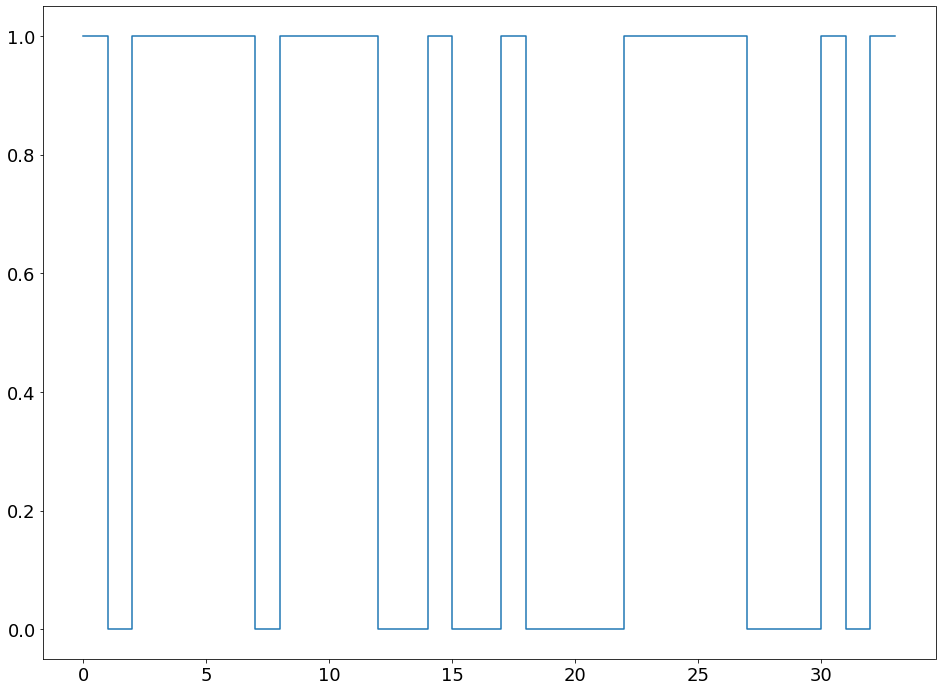

In [44]:
j=0
for x in senal_original:
    data.append(j)
    j=j+1
print('Gráfico del mensaje obtenido con ruido')
xaxis = np.arange(0, data[-1] + 1)
yaxis = np.array(senal_original)
step(xaxis, yaxis)
#for k  in range(0,n,1):
#    plt.vlines(k,1,-1, color= 'm', linestyles='dotted') 
show()

In [45]:
#position=detectError(senal_secuencia,6)
position=detectError('1110000000011001001000000000000010',6)
print('La posición de error es:',position)

La posición de error es: 35


In [46]:
#Decodificamos Hamming
data_list=list(senal_secuencia)
i=1
data_retrieve=[]
while i<len(data_list):
    if isPowerOfTwo(i):
         print(data_list[i])
    else:
        data_retrieve.append(data_list[-i])
    i=i+1
data_retrieve.append(data_list[0])
data_retrieve.reverse()
n=7
i=0
data_cipher=[data_retrieve[i:i+n] for i in range(0, len(data_retrieve), n)]
print(data_cipher)

1
0
1
0
0
0
[['1', '1', '1', '1', '1', '1', '1'], ['0', '1', '1', '1', '1', '0', '0'], ['1', '0', '0', '0', '0', '0', '0'], ['1', '1', '1', '1', '0', '0', '1']]


In [47]:
#Obtenemos la plabra enviada por el mensaje
bin_data1=data_cipher[0][0]+data_cipher[0][1]+data_cipher[0][2]+data_cipher[0][3]+data_cipher[0][4]+data_cipher[0][5]+data_cipher[0][6]
bin_data2=data_cipher[1][0]+data_cipher[1][1]+data_cipher[1][2]+data_cipher[1][3]+data_cipher[1][4]+data_cipher[1][5]+data_cipher[1][6]
bin_data3=data_cipher[2][0]+data_cipher[2][1]+data_cipher[2][2]+data_cipher[2][3]+data_cipher[2][4]+data_cipher[2][5]+data_cipher[2][6]
bin_data4=data_cipher[3][0]+data_cipher[3][1]+data_cipher[3][2]+data_cipher[3][3]+data_cipher[3][4]+data_cipher[3][5]+data_cipher[3][6]
letra1=convertToStr(bin_data1)
letra2=convertToStr(bin_data2)
letra3=convertToStr(bin_data3)
letra4=convertToStr(bin_data4)
palabra=letra1+letra2+letra3+letra4
print(palabra)

  < @ y
